<a href="https://colab.research.google.com/github/naoboru/CIS545/blob/main/Heart_Disease_Health_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports/ Setup
Run the following cells to set up the notebook.


In [ ]:
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.utils import resample
from collections import Counter
import seaborn as sns

#Motivation

#Exploratory Data Analysis

##Load and Analyze Heart Disease Health Indicators Dataset

In this code snippet, the goal is to load and analyze the Heart Disease Health Indicators dataset using Python's Pandas library.

#Metadata
The dataset is stored in a CSV file named `heart_disease_health_indicators.csv`, which contains information about various health indicators related to heart disease.

#TO-DO:

* Load the `heart_disease_health_indicators.csv` file using the `read_csv()` function from the Pandas library and store it in a dataframe named `heart_data`.

* Call the `info()` method on the `heart_data` dataframe to display metadata about the dataset, including the number of non-null values and data types for each column.

* Call the `describe()` method on the `heart_data` dataframe to display descriptive statistics for each column, such as count, mean, standard deviation, minimum and maximum values, and quartile values.

* By completing these steps, we can gain initial insights into the structure and characteristics of the loaded dataset, which is a crucial first step in any data analysis task.

In [ ]:
heart_data = pd.read_csv('/content/heart_disease_health_indicators.csv')
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
heart_data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


###Data Cleaning of Heart Disease Health Indicators Dataset

In this code snippet, the goal is to clean the Heart Disease Health Indicators dataset using Python's Pandas library.

**TO-DO**:

* Remove all rows with missing values using the `dropna()` method on the `heart_data` dataframe. This will remove any incomplete data that could potentially bias our analysis.

* Display the first few rows of the 'heart_data' dataframe using the `head()` method to ensure that the data looks correct after removing missing values.

* Rename the following columns in the `heart_data` dataframe using the `rename()` method: `HighBP` to `HighBloodPressure`, `HighChol` to `HighCholesterol`, `CholCheck` to `CholesterolCheck`, `DiffWalk` to `DifficultyWalking`, `AnyHealthcare` to `HasHealthcare`, `NoDocbcCost` to `CantAffordDoc`, `GenHlth` to `GeneralHealth`, `MentHlth` to `MentalHealth`, `PhysHlth` to `PhysicalHealth`. This will make the column names more descriptive and easier to understand.

After performing these steps, we will have a cleaner and more understandable dataset that is ready for further analysis.

In [ ]:
heart_data.dropna(inplace= True)

heart_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
heart_data.rename(columns = {'HighBP':'HighBloodPressure', 'HighChol':'HighCholesterol', 'CholCheck':'CholesterolCheck', \
                             'DiffWalk':'DifficultyWalking', 'AnyHealthcare':'HasHealthcare', 'NoDocbcCost':'CantAffordDoc', \
                             'GenHlth':'GeneralHealth', 'MentHlth':'MentalHealth', 'PhysHlth':'PhysicalHealth'}, inplace=True)

### Transform Data in Heart Disease Health Indicators Dataset

In this code snippet, the goal is to transform the Heart Disease Health Indicators dataset using Python's Pandas library.

**TO-DO**:
* Define two helper functions named `transformMentPhysHealth(x)` and `transformGenHealth(x)`. These functions will be used to transform the data in the `MentalHealth`, `PhysicalHealth`, and 'GeneralHealth' columns to numerical values that can be used in analysis.

* Combine values of 1 and 2 in the `Diabetes` column to be 1 using the `apply()` method on the `heart_data` dataframe. This will make it easier to analyze diabetes as a binary variable.

* Apply the `transformMentPhysHealth(x)` function to the `MentalHealth` and `PhysicalHealth` columns using the `apply()` method on the `heart_data` dataframe.

* Apply the `transformGenHealth(x)` function to the `GeneralHealth` column using the `apply()` method on the `heart_data` dataframe.

After performing these transformations, display the first few rows of the `heart_data` dataframe using the `head()` method to ensure that the data looks correct.

In [ ]:
def transformMentPhysHealth(x) :
  if x == 0:
    return 4.0
  elif x > 0 and x <= 8:
    return 3.0
  elif x > 8 and x <= 16:
    return 2.0
  elif x > 16 and x <= 24:
    return 1.0
  elif x > 24 and x <= 31:
    return 0.0

def transformGenHealth(x) :
  if x == 1.0:
    return 5.0
  elif x == 2.0:
    return 4.0
  elif x == 3.0:
    return 3.0
  elif x == 4.0:
    return 2.0
  elif x == 5.0:
    return 1.0

In [ ]:
#combine values of 1 and 2 in diabetes to be 1, change mental health to scale of 4,
#change physical health to scale of 4, invert general health numbers
heart_data['Diabetes'] = heart_data.apply(lambda x: 0 if x['Diabetes']==0 else 1, axis=1)
heart_data['MentalHealth'] = heart_data['MentalHealth'].apply(lambda x : transformMentPhysHealth(x))
heart_data['PhysicalHealth'] = heart_data['PhysicalHealth'].apply(lambda x : transformMentPhysHealth(x))
heart_data['GeneralHealth'] = heart_data['GeneralHealth'].apply(lambda x : transformGenHealth(x))
heart_data.head()

,HeartDiseaseorAttack,HighBloodPressure,HighCholesterol,CholesterolCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,HasHealthcare,CantAffordDoc,GeneralHealth,MentalHealth,PhysicalHealth,DifficultyWalking,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0,0.0,0.0,...,1.0,0.0,1.0,1.0,2.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0,1.0,0.0,...,0.0,1.0,3.0,4.0,4.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0,1.0,1.0,...,1.0,0.0,4.0,4.0,4.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0,1.0,1.0,...,1.0,0.0,4.0,3.0,4.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
#set seaborn parameters to create a legible correlation heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=0.5)

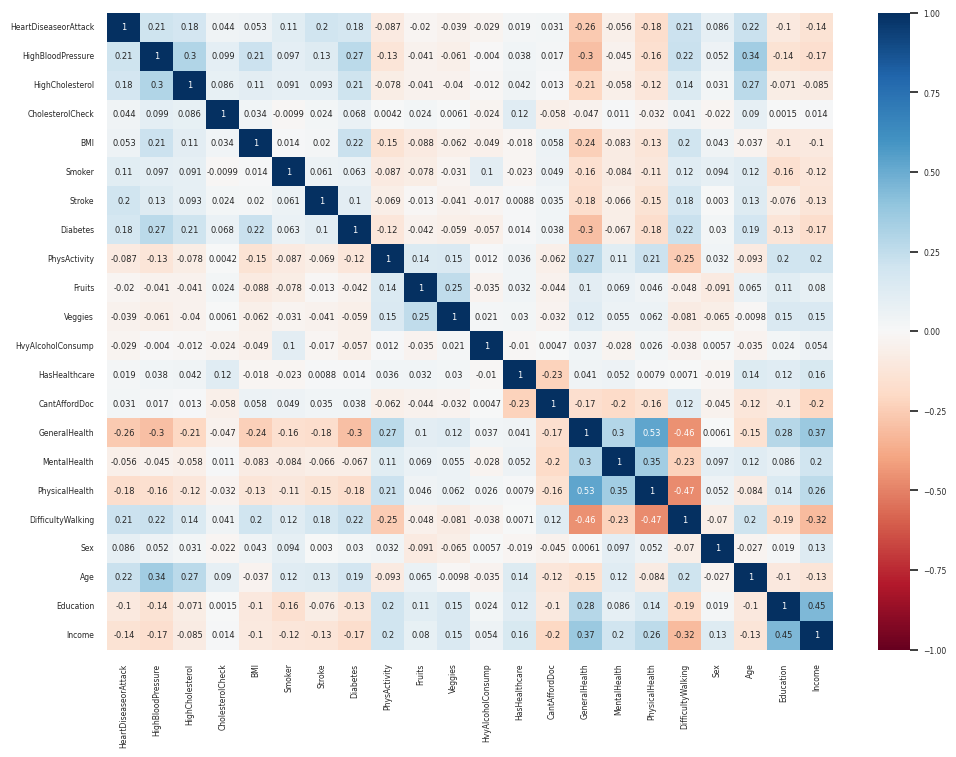

In [ ]:
#create correlation heatmap between all variables to see how
heat = sns.heatmap(heart_data.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu')

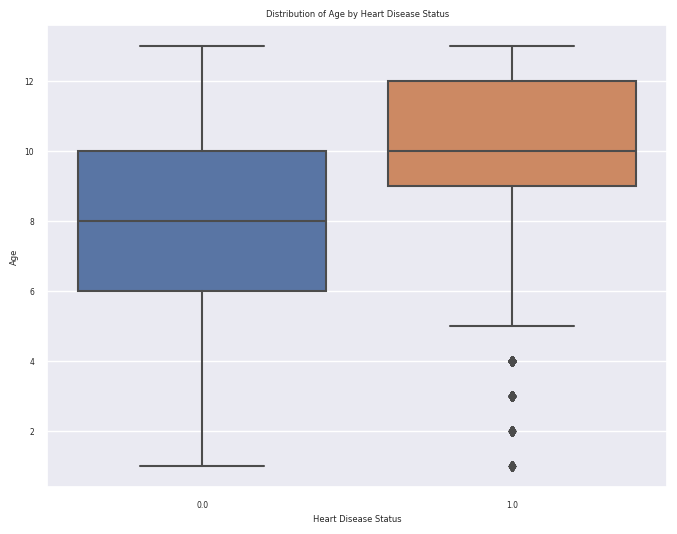

In [ ]:
#   Create a box plot showing the distribution of age by heart disease status

# Create a new dataframe with columns 'Age' and 'heart_disease'
age_hd = heart_data.loc[:, ['Age', 'HeartDiseaseorAttack']]

# Create the box plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='HeartDiseaseorAttack', y='Age', data=age_hd)
ax.set_xlabel('Heart Disease Status')
ax.set_ylabel('Age')
ax.set_title('Distribution of Age by Heart Disease Status')
plt.show()

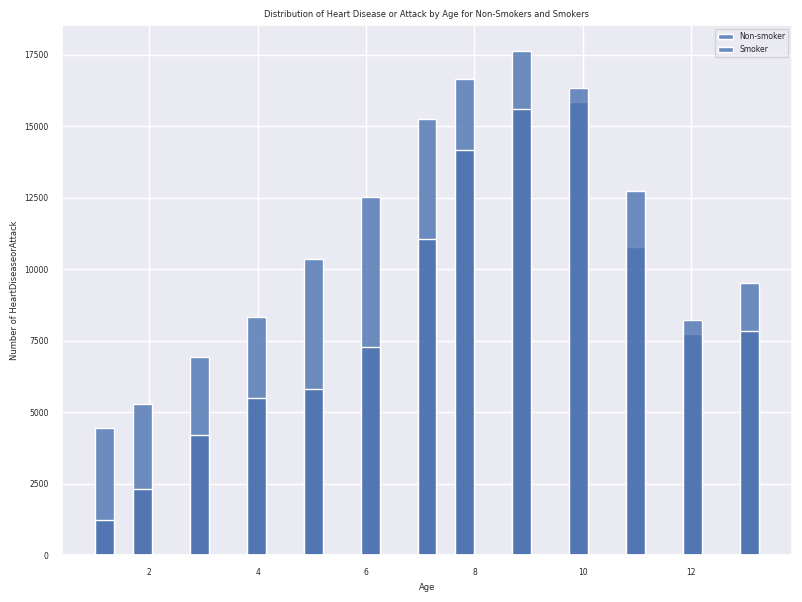

In [ ]:
# Create a new dataframe with columns 'Age', 'HeartDiseaseorAttack', and 'SmokingStatus'
age_hd_smoke = heart_data.loc[:, ['Age', 'HeartDiseaseorAttack', 'Smoker']]

# Filter for non-smokers and smokers
non_smokers = age_hd_smoke[age_hd_smoke['Smoker'] == 0.0]
smokers = age_hd_smoke[age_hd_smoke['Smoker'] == 1.0]

# Create the histogram plot for non-smokers and smokers side by side
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
opacity = 0.8

sns.histplot(x='Age', hue='Smoker', data=non_smokers, alpha=0.8, color='blue', stat= 'count', label='Non-smoker', binwidth=bar_width, multiple='dodge')
sns.histplot(x='Age', hue='Smoker', data=smokers, alpha=0.8, color='orange', label='Smoker', binwidth=bar_width, multiple='dodge')

ax.set_xlabel('Age')
ax.set_ylabel('Number of HeartDiseaseorAttack')
ax.set_title('Distribution of Heart Disease or Attack by Age for Non-Smokers and Smokers')
ax.legend()
plt.tight_layout()
plt.show()

#Sampling

From the **EDA** section above we know that the non-heart disease/attack class is larger, but let's calculate the actual size of the abundant and sparse classes:

In [ ]:
#determine size of heart disease/attack class, and non-heart disease/attack class
print('Size of heart disease/attack class: ' \
      + str(heart_data[heart_data['HeartDiseaseorAttack']==1.0].shape[0]))
print('Size of non-heart disease/attack class: ' \
      + str(heart_data[heart_data['HeartDiseaseorAttack']==0.0].shape[0]))

First, we will set apart 20% of the data for testing purposes:

In [ ]:
#use the sample() method to shuffle the data
heart_shuffled = heart_data.sample(frac=1, ignore_index=True)

In [ ]:
#use the first 20% of data for testing, and last 80% for training
heart_test = heart_shuffled.iloc[:50736, :]
heart_train = heart_shuffled.iloc[50736:, :]

##Creating an array of samples by iteratively undersampling

There is approximately 10 times more abundant data than sparse data.  We will create 5 better-balanced datasets comprised of *a fifth* of the abundant training data and *all* the sparse training data for later modeling via bagging and stacking:

In [ ]:
#create a sparse training dataset and an abundant training dataset
abun_train_df = heart_train[heart_train['HeartDiseaseorAttack']==0.0].sample(frac=1, ignore_index=True)
sparse_train_df = heart_train[heart_train['HeartDiseaseorAttack']==1.0]

In [ ]:
#create 5 groups of samples that are a fifth the length of abun_df, append the sparse_df to each,
#then shuffle
under_samples = []
under_samples.append(pd.concat([abun_train_df.iloc[:36765, :], sparse_train_df], axis=0).sample(frac=1))
under_samples.append(pd.concat([abun_train_df.iloc[36765:73530, :], sparse_train_df], axis=0).sample(frac=1))
under_samples.append(pd.concat([abun_train_df.iloc[73530:110295, :], sparse_train_df], axis=0).sample(frac=1))
under_samples.append(pd.concat([abun_train_df.iloc[110295:147060, :], sparse_train_df], axis=0).sample(frac=1))
under_samples.append(pd.concat([abun_train_df.iloc[147060:, :], sparse_train_df], axis=0).sample(frac=1))

##Oversampling with the resample() method

Our next approach to sampling will be to "reuse" the sparse data until approximate parity is reached with the abundant data.  This means duplicating each heart disease/attack case nine times.

In [ ]:
features = heart_data.drop(columns='HeartDiseaseorAttack')
targets = heart_data['HeartDiseaseorAttack']
X_train, X_test_re, y_train, y_test_re = train_test_split(features, targets, test_size=0.25, random_state=0)

In [ ]:
all_train = pd.concat([X_train, y_train], axis=1)
abun_train_df = all_train[all_train['HeartDiseaseorAttack']==0.0].sample(frac=1, ignore_index=True)
sparse_train_df = all_train[all_train['HeartDiseaseorAttack']==1.0]

In [ ]:
sparse_up = resample(sparse_train_df, replace=True, n_samples=int(len(abun_train_df)/3), random_state=0)

In [ ]:
oversample = pd.concat([abun_train_df, sparse_up]).sample(frac=1, ignore_index=True)

#Modeling

##Logistic Regression on the Original Dataset




To get a baseline accuracy, we will run a train-test split then run a simple logistic regression on the data.  

In [ ]:
#split into features and target (i.e. heart disease/attack)
features = heart_data.drop(columns='HeartDiseaseorAttack')
target = heart_data['HeartDiseaseorAttack']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [ ]:
#initialize model fit it to the training set
lr = LogisticRegression().fit(X_train, y_train)
#use the above model to make predictions
prediction = lr.predict(X_test)
#find the accuracy of the logistic regression method
log_acc = lr.score(X_test, y_test)

In [ ]:
log_acc

It seems that the accuracy is very close to the percentage of non-heart disease/attack cases, approximately 90%.  This implies that the logistic regression model is too simplistic, classifying almost everything as the abundant case.  We can support this assumption by plotting the confusion matrix:

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(6,6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'GnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [ ]:
#precision = (TP / (TP + FP))
precision = (687 / (687 + 555))
precision

In [ ]:
#false negative rate = (FN / (FN + TP)
fnr = (4085/ (4085 + 687))
fnr

As expected, the precision is low at about 55% and the false negative rate is very high at about 85%.  These values both imply that the model cannot reliably predict a positive case.  We need a more sophisticated approach to create an accurate model with this particular dataset.  We will now try various ensembling approaches.

##Bagging: Creating an Ensemble of Decision Trees

With our list of 10 balanced datasets from the **Sampling** section, we will train 10 decision tree classifiers and use them in a bagging model:

In [ ]:
forrest_list = []
#loop through the list of balanced samples
for sample in under_samples:
  #split into features and targets
  under_features = sample.drop(columns='HeartDiseaseorAttack')
  under_targets = sample['HeartDiseaseorAttack']
  #create and train a new decision tree
  dt = tree.DecisionTreeClassifier()
  dt = dt.fit(under_features, under_targets)
  #add the new decision tree to the forrest
  forrest_list.append(dt)

In [ ]:
#split the test dataset into features and targets
test_features = heart_test.drop(columns='HeartDiseaseorAttack')
test_targets = heart_test['HeartDiseaseorAttack']

In [ ]:
#create a numpy array of all zeros w/ length of test dataset
#this will serve as a running total of "votes" for a classification of 1
running_totals = np.zeros(50736)
#for each tree in the ensemble
for dt in forrest_list:
  #determine predictions for each row in the test dataset
  pred = dt.predict(test_features)
  #add new "votes" for classification of 1 for that row
  running_totals += pred

In [ ]:
#for every row that has > 4 "votes", make classification 1
#else, make classification 0
predictions_list = [1 if num > 4 else 0 for num in running_totals]
#give both predictions and targets a numpy array form
test_predictions = np.array(predictions_list)
test_targets = test_targets.to_numpy()

In [ ]:
#divide total correct predictions by number of predictions to determine accuracy
correct = (test_predictions == test_targets)
accuracy = correct.sum() / correct.size
accuracy

##Stacking

We will now determine if

In [ ]:
#initiate classifiers and add them to a dictionary
lr = LogisticRegression()
kn = KNeighborsClassifier()
dt = tree.DecisionTreeClassifier()
nb = GaussianNB()
rf = RandomForestClassifier()
classifier_list = [lr, kn, dt, nb, rf]

In [ ]:
#split the test dataset into features and targets
test_features = heart_test.drop(columns='HeartDiseaseorAttack')
test_targets = heart_test['HeartDiseaseorAttack']

In [ ]:
#loop through the list of balanced samples
for clf in classifier_list:
  #split into features and targets
  train_features = heart_train.drop(columns='HeartDiseaseorAttack')
  train_targets = heart_train['HeartDiseaseorAttack']
  #choose a classifier from the list and train it
  clf = clf.fit(train_features, train_targets)

In [ ]:
#create a numpy array of all zeros w/ length of test dataset
#this will serve as a running total of "votes" for a classification of 1
running_totals = np.zeros(50736)
#for each classifier in the ensemble
for clf in classifier_list:
  #determine predictions for each row in the test dataset
  pred = clf.predict(test_features)
  #add new "votes" for classification of 1 for that row
  running_totals += pred

In [ ]:
#for every row that has >= 5 "votes", make classification 1
#else, make classification 0
predictions_list = [1 if num > 4 else 0 for num in running_totals]
#give both predictions and targets a numpy array form
test_predictions = np.array(predictions_list)
test_targets = test_targets.to_numpy()

In [ ]:
#divide total correct predictions by number of predictions to determine accuracy
correct = (test_predictions == test_targets)
accuracy = correct.sum() / correct.size
accuracy